Downlaod genomes to local directory, view

In [ ]:
[dq2033@log-1 task2]$ find /scratch/work/courses/BI7653/hw5.2022/task2/smallerbams -name \*bam > bamfiles_for_GLs.txt
[dq2033@log-1 task2]$ cat bamfiles_for_GLs.txt
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA19130.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA12763.mapped.ILLUMINA.bwa.CEU.low_coverage.20130502.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA19007.mapped.ILLUMINA.bwa.JPT.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18970.mapped.ILLUMINA.bwa.JPT.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18943.mapped.ILLUMINA.bwa.JPT.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA12874.mapped.ILLUMINA.bwa.CEU.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18949.mapped.ILLUMINA.bwa.JPT.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA11831.mapped.ILLUMINA.bwa.CEU.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18871.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA06994.mapped.ILLUMINA.bwa.CEU.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA19137.mapped.ILLUMINA.bwa.YRI.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA07000.mapped.ILLUMINA.bwa.CEU.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA19207.mapped.ILLUMINA.bwa.YRI.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA19210.mapped.ILLUMINA.bwa.YRI.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA19138.mapped.ILLUMINA.bwa.YRI.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA19099.mapped.ILLUMINA.bwa.YRI.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA19005.mapped.ILLUMINA.bwa.JPT.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18912.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18961.mapped.ILLUMINA.bwa.JPT.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA11994.mapped.ILLUMINA.bwa.CEU.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18945.mapped.ILLUMINA.bwa.JPT.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA12156.mapped.ILLUMINA.bwa.CEU.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA12003.mapped.ILLUMINA.bwa.CEU.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18856.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18981.mapped.ILLUMINA.bwa.JPT.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18990.mapped.ILLUMINA.bwa.JPT.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA19204.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA07357.mapped.ILLUMINA.bwa.CEU.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA18995.mapped.ILLUMINA.bwa.JPT.low_coverage.20130415.bam
/scratch/work/courses/BI7653/hw5.2022/task2/smallerbams/smallNA11829.mapped.ILLUMINA.bwa.CEU.low_coverage.20130415.bam

Write slurm script in order to generate a table of genotype likelihoods at sites that are likely to be polymorphic in a set of 30 small BAM files from the 1000 Genomes Project. GATK genotype likelihood model is used. 

In [ ]:
#!/bin/bash
#
#SBATCH --nodes=1
#SBATCH --tasks-per-node=1
#SBATCH --cpus-per-task=4
#SBATCH --time=8:00:00
#SBATCH --mem=10GB
#SBATCH --job-name=slurm_template
#SBATCH --mail-type=FAIL,END
#SBATCH --mail-user=<dq2033@nyu.edu>

module purge

module load angsd/intel/0.933

angsd -bam bamfiles_for_GLs.txt -P ${SLURM_CPUS_PER_TASK} -GL 2 -doMajorMinor 1 -doMaf 1 -SNP_pval 2e-6 -minMapQ 30 -minQ 20 -minInd 25 -minMaf 0.05 -doGlf 2 -out GLs.gz


For each sample there are 3 genotype likelihoods. For example, Ind0 Ind0 Ind0
Each genotype likelihood in order is the major/major, major/minor and minor/minor genotypes. 

Use ADMIX for genotype likelihoods in ancestry estimation 

Download the pre-computed GLs and a population info file which provides information about the sample origins. Look at files. 

In [ ]:
wget popgen.dk/software/download/NGSadmix/data/Demo1input.gz
wget popgen.dk/software/download/NGSadmix/data/Demo1pop.info

In [ ]:
[dq2033@cs024 task3]$ gunzip -c Demo1input.gz | head -n 10 | cut -f 1-10 | column -t
marker      allele1  allele2  Ind0      Ind0      Ind0      Ind1      Ind1      Ind1      Ind2
1_15000765  2        0        0.000070  0.333333  0.666596  0.000000  1.000000  0.000000  0.969666
1_15001337  3        1        0.941155  0.058845  0.000000  0.941099  0.058901  0.000000  0.888859
1_15001470  0        2        0.969684  0.030316  0.000000  0.888825  0.111175  0.000000  0.999024
1_15001480  3        1        0.969682  0.030318  0.000000  0.001054  0.995607  0.003339  0.998049
1_15001731  3        2        0.000000  0.058903  0.941097  0.000266  0.999204  0.000530  0.000000
1_15001817  0        2        0.969632  0.030368  0.000000  0.665549  0.333333  0.001117  0.999023
1_15002813  1        3        0.799979  0.200021  0.000000  0.001058  0.998937  0.000004  0.984610
1_15002941  2        0        0.888810  0.111190  0.000000  0.888706  0.111294  0.000000  0.941138
1_15002958  2        0        0.799990  0.200010  0.000000  0.000000  0.999999  0.000001  0.941165

Run NGS Admix with K=3 with slurm script below:

In [ ]:
#!/bin/bash
#
#SBATCH --nodes=1
#SBATCH --tasks-per-node=1
#SBATCH --cpus-per-task=1
#SBATCH --time=2:00:00
#SBATCH --mem=8GB
#SBATCH --job-name=slurm_week5_task3
#SBATCH --mail-type=FAIL,END
#SBATCH --mail-user=<dq2033@nyu.edu>

module purge

module load ngsadmix/intel/20210224

NGSadmix -likes Demo1input.gz -K 3 -minMaf 0.05 -seed 1 -o Demo1NGSadmix

Look at  .qopt file. (estimate of the individual’s ancestry proportion from each of the assumed K=3 ancestral populations)

In [ ]:
[dq2033@log-1 task3]$ cat Demo1NGSadmix.qopt
0.00000000099999999998 0.00000000099999999998 0.99999999799999994554 
0.00000000099999999994 0.00000000682329544673 0.99999999217670454410 
0.77973787468653987798 0.22026212431345998377 0.00000000099999999998 
0.99999999800000005656 0.00000000099999999990 0.00000000099999999990 
0.00000000099999999998 0.61099794553594988233 0.38900205346405025697 
0.99999999800000005656 0.00000000099999999992 0.00000000099999999992 
0.00000000099999999999 0.13737919210590293639 0.86262080689409714740 
0.00000000099999999995 0.99999999799999994554 0.00000000099999999995 
0.99999999800000005656 0.00000000099999999998 0.00000000099999999998 
0.00000000099999999993 0.99999999799999994554 0.00000000099999999993 
0.00000000099999999987 0.00000000099999999987 0.99999999800000005656 
0.00000000099999999996 0.99999999799999994554 0.00000000099999999996 
0.00000000099999999992 0.99999999799999994554 0.00000000099999999992 
0.99999999800000005656 0.00000000099999999997 0.00000000099999999997 
0.00000000099999999993 0.00000000099999999993 0.99999999800000005656 
0.00000000099999999993 0.00000000099999999993 0.99999999799999994554 
0.00000000099999999989 0.00000000099999999989 0.99999999799999994554 
0.00000000099999999989 0.99999999800000005656 0.00000000099999999989 
0.97769433625000445875 0.00000000099999999999 0.02230566274999567014 
0.99999999799999994554 0.00000000099999999997 0.00000000099999999997 
0.99999999799999994554 0.00000000099999999995 0.00000000099999999995 
0.05813403902561260772 0.10535187032870108048 0.83651409064568627016 
0.76647507984328744346 0.23352491915671258482 0.00000000099999999996 
0.00000000099999999997 0.71605891997462478571 0.28394107902537529808 
0.99999999800000005656 0.00000000099999999995 0.00000000099999999995 
0.00000000099999999998 0.99863391543890434043 0.00136608356109573750 
0.00000000099999999990 0.00000000099999999990 0.99999999800000005656 
0.00000000099999999995 0.62712274052679073399 0.37287725847320934980 
0.00000000099999999998 0.00000000099999999998 0.99999999799999994554 
0.00000000099999999993 0.99999999800000005656 0.00000000099999999993

Transfer files to local computer. Load r clone module (rclone/1.53.3), copy ngs.week5

In [ ]:
[dq2033@log-1 ngs.week5]$ pwd
/scratch/dq2033/ngs.week5
[dq2033@log-1 ngs.week5]$ rclone copy /scratch/dq2033/ngs.week5 mygoogledrive:hpc_uploads

Review the files and display hidden characters with -et options to cat:

In [ ]:
[dq2033@log-1 task3]$ cat -et Demo1NGSadmix.qopt | head -n 5
0.00000000099999999998 0.00000000099999999998 0.99999999799999994554 $
0.00000000099999999994 0.00000000682329544673 0.99999999217670454410 $
0.77973787468653987798 0.22026212431345998377 0.00000000099999999998 $
0.99999999800000005656 0.00000000099999999990 0.00000000099999999990 $
0.00000000099999999998 0.61099794553594988233 0.38900205346405025697 $

[dq2033@log-1 task3]$ cat -et Demo1pop.info | head -n 5
JPT smallNA18949$
JPT smallNA19005$
YRI smallNA19099$
YRI smallNA19138$
CEU smallNA11831$

Strip Extra Whitespace for graphing:

In [ ]:
[dq2033@log-1 task3]$ perl -pe 's/\s$//' Demo1NGSadmix.qopt > Demo1NGSadmix_nowhite.qopt
[dq2033@log-1 task3]$ cat Demo1NGSadmix_nowhite.qopt

See code 1000_Genomes_ancestry_diagrams_W5.Rmd for R code to produce admix graphs. 

Resulting graph:

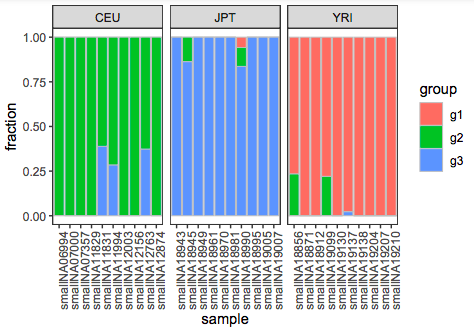

Analysis is repeated with a larger sample that includes the following populations from the 1000 genomes project

ASW = Americans of African Ancestry in SW USA
CEU = Utah residents (CEPH) with Northern and Western European ancestry
CHB = Han Chinese in Beijing
MXL = Mexican Ancestry from Los Angeles USA
YRI = Yoruba in Ibadan, Nigeria

Slurm Script:

In [ ]:
#!/bin/bash
#
#SBATCH --nodes=1
#SBATCH --tasks-per-node=1
#SBATCH --cpus-per-task=1
#SBATCH --time=2:00:00
#SBATCH --mem=8GB
#SBATCH --job-name=slurm_week5_task3
#SBATCH --mail-type=FAIL,END
#SBATCH --mail-user=<dq2033@nyu.edu>

module purge

module load ngsadmix/intel/20210224

NGSadmix -likes Demo1input.gz -K 3 -minMaf 0.05 -seed 1 -o Demo1NGSadmix_3
NGSadmix -likes Demo1input.gz -K 4 -minMaf 0.05 -seed 1 -o Demo1NGSadmix_4
NGSadmix -likes Demo1input.gz -K 5 -minMaf 0.05 -seed 1 -o Demo1NGSadmix_5

Resulting graphs at K=3, K=4 and K=5:

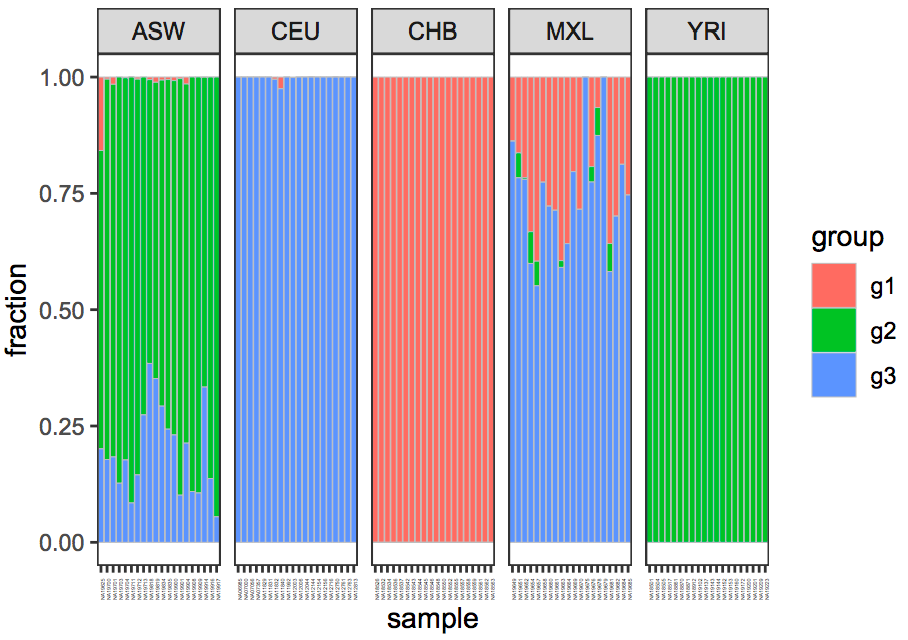

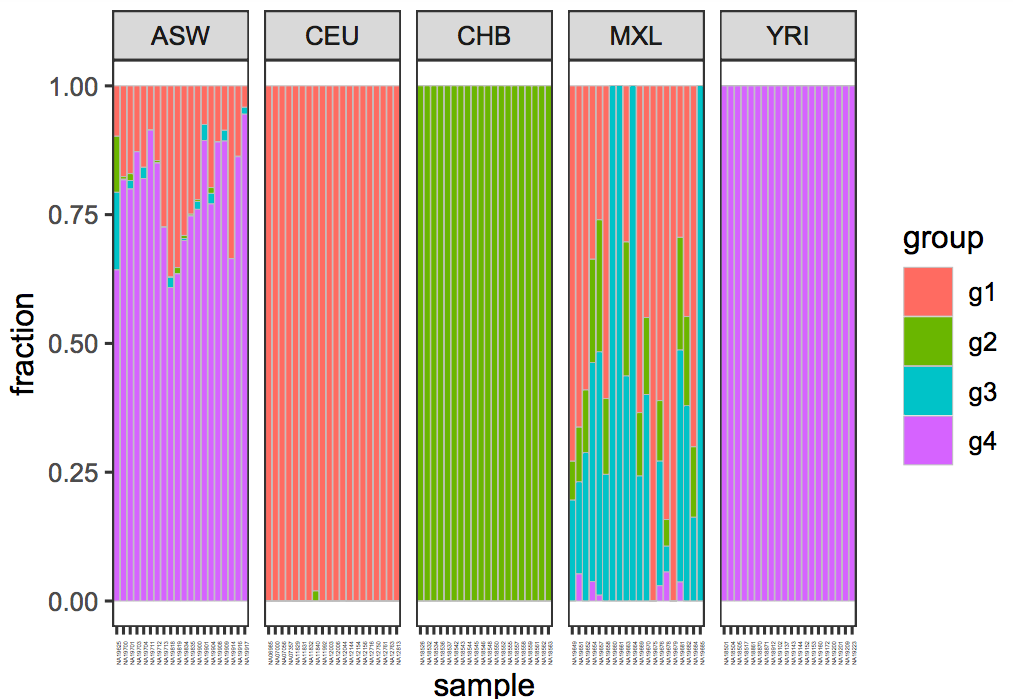

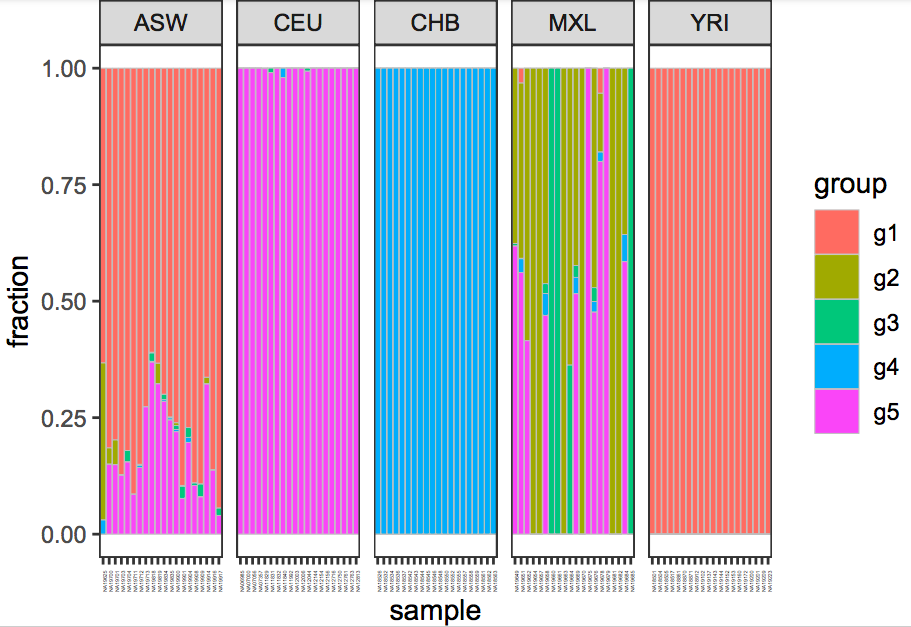